# 2020707035 박시언 lab2

### 1. 2d 랜덤워크 시뮬레이션
### - 스텝마다 확률을 부여하는데 불균등한 확률을 부여합니다.
### - X 축으로 +로 이동학 확률은 70, -1로 이동할 확률은 30 입니다.
### - y축으로 +1 이동할 확률은 60, -1은 40%입니다.
### - 각 축에 대해 1000번의 스템 시뮬레이션을 진행합니다.
### - 이후 위치를 추적합니다.

시뮬레이션 1의 최종 위치: (np.int64(408), np.int64(216))
원점에서 시뮬레이션 1의 최종 위치까지의 거리: 461.65
----------------------------------------
시뮬레이션 2의 최종 위치: (np.int64(422), np.int64(254))
원점에서 시뮬레이션 2의 최종 위치까지의 거리: 492.54
----------------------------------------
시뮬레이션 3의 최종 위치: (np.int64(406), np.int64(228))
원점에서 시뮬레이션 3의 최종 위치까지의 거리: 465.64
----------------------------------------
시뮬레이션 4의 최종 위치: (np.int64(442), np.int64(240))
원점에서 시뮬레이션 4의 최종 위치까지의 거리: 502.96
----------------------------------------


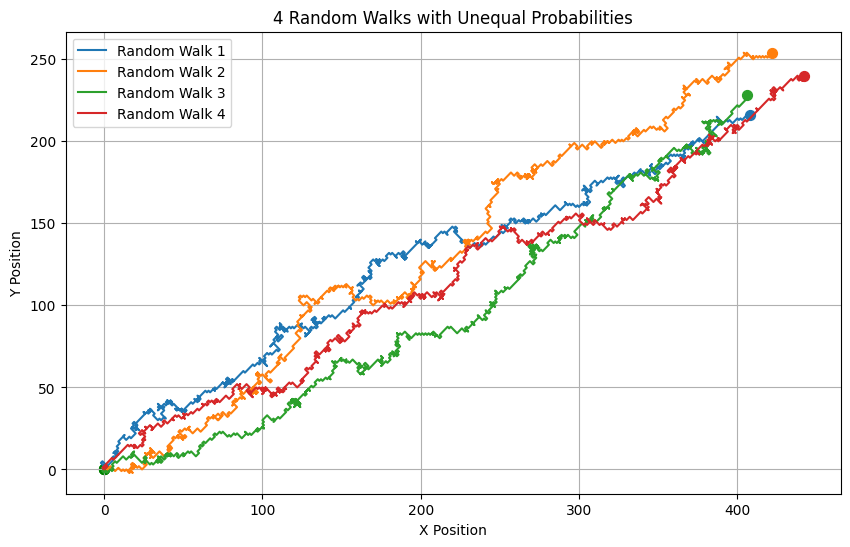

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# (1) 전체 시뮬레이션을 4번 반복하기 위해 반복문을 사용합니다.
plt.figure(figsize=(10, 6))  # 전체 플롯의 크기를 설정합니다.

for i in range(4):
    # x축과 y축 스텝 생성 (랜덤하게 +1 또는 -1로 이동)
    x_steps = np.random.choice([-1, 1], size=1000, p=[0.3, 0.7])
    y_steps = np.random.choice([-1, 1], size=1000, p=[0.4, 0.6])
    
    # 각 스텝의 누적합을 계산하여 위치를 추적합니다.
    x_positions = np.cumsum(x_steps)
    y_positions = np.cumsum(y_steps)
    
    # (2) 각 시뮬레이션의 궤적을 플롯합니다.
    plt.plot(x_positions, y_positions, label=f'Random Walk {i+1}')
    plt.scatter(0, 0, color='green', s=50)  # 모든 시뮬레이션의 시작점 (0,0) 표시
    plt.scatter(x_positions[-1], y_positions[-1], s=50)  # 각 시뮬레이션의 마지막 위치 표시
    
    # (3) 최종 위치와 거리 계산
    final_position = (x_positions[-1], y_positions[-1])
    distance = np.sqrt(final_position[0]**2 + final_position[1]**2)  # 피타고라스 정리 사용
    
    print(f"시뮬레이션 {i+1}의 최종 위치: {final_position}")
    print(f"원점에서 시뮬레이션 {i+1}의 최종 위치까지의 거리: {round(distance, 2)}")
    print("-" * 40)  # 구분선 출력

# (4) 그래프 제목과 레이블 설정
plt.title('4 Random Walks with Unequal Probabilities')
plt.xlabel('X Position')  # x축 라벨
plt.ylabel('Y Position')  # y축 라벨
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 보여주기


### 다양한 연도에 대한 올림픽 메달 데이터를 분석합니다.
### 메달에 따른 가중치를 만들어 total score를 계산합니다. 
### groupby를 사용하여 메달 평균 점수가 가장 높은 나라를 찾습니다.
### 골드 메달 수를 보여주는 차트를 생성합니다


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (1) 데이터프레임 생성
# 나라와 연도별로 올림픽 메달 데이터를 만듭니다.
data = {
    'Country': ['USA', 'China', 'Russia', 'Germany', 'Japan', 
                'USA', 'China', 'Russia', 'Germany', 'Japan'],
    'Year': [2016, 2016, 2016, 2016, 2016, 
             2020, 2020, 2020, 2020, 2020],
    'Gold': np.random.randint(0, 20, size=10),  # Gold 메달 랜덤 값 생성
    'Silver': np.random.randint(0, 20, size=10),  # Silver 메달 랜덤 값 생성
    'Bronze': np.random.randint(0, 20, size=10)  # Bronze 메달 랜덤 값 생성
}

In [15]:

# pandas DataFrame으로 데이터 생성
df = pd.DataFrame(data)

# 데이터프레임 출력해서 확인 (간단히 보기 위해)
print("데이터프레임 미리 보기:")
print(df)
print("-" * 40)

# (2) 각 나라의 총 메달 수 계산
df['Total Medals'] = df['Gold'] + df['Silver'] + df['Bronze']
print("각 나라의 총 메달 수:")
print(df[['Country', 'Total Medals']])
print("-" * 40)

# (3) 가중 점수 열 추가
# 가중치: Gold = 3, Silver = 2, Bronze = 1
df['Total Score'] = 3 * df['Gold'] + 2 * df['Silver'] + 1 * df['Bronze']
print("각 나라의 총 점수 (가중치 적용):")
print(df[['Country', 'Total Score']])
print("-" * 40)

# (4) groupby()를 사용하여 평균 메달 점수 계산
average_scores = df.groupby('Country')['Total Score'].mean()
print("각 나라의 평균 메달 점수:")
print(average_scores)
print("-" * 40)

# 평균 메달 점수가 가장 높은 나라 찾기
top_country = average_scores.idxmax()
top_score = average_scores.max()
print(f"평균 메달 점수가 가장 높은 나라: {top_country} (점수: {top_score})")
print("-" * 40)

데이터프레임 미리 보기:
   Country  Year  Gold  Silver  Bronze
0      USA  2016     1       0       4
1    China  2016     8       7       0
2   Russia  2016     9      17      11
3  Germany  2016     8      15       3
4    Japan  2016     4       8      10
5      USA  2020    10      12       8
6    China  2020     3       0       6
7   Russia  2020     6      16       7
8  Germany  2020     4      16      15
9    Japan  2020    17      14      16
----------------------------------------
각 나라의 총 메달 수:
   Country  Total Medals
0      USA             5
1    China            15
2   Russia            37
3  Germany            26
4    Japan            22
5      USA            30
6    China             9
7   Russia            29
8  Germany            35
9    Japan            47
----------------------------------------
각 나라의 총 점수 (가중치 적용):
   Country  Total Score
0      USA            7
1    China           38
2   Russia           72
3  Germany           57
4    Japan           38
5      USA           

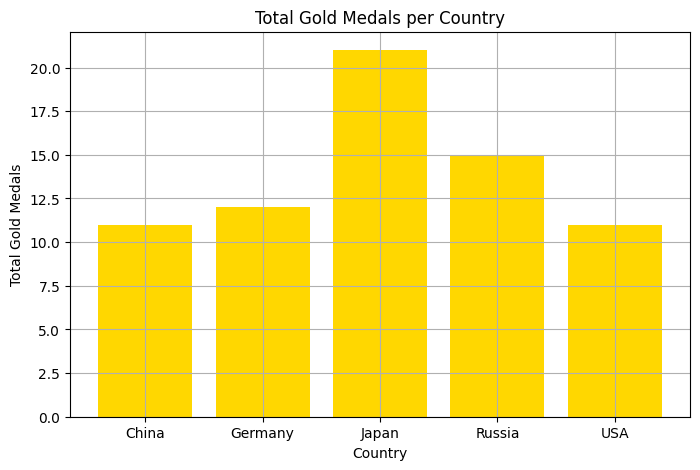

In [16]:

# (5) 골드 메달 수를 보여주는 바 차트 생성
# 각 나라의 총 Gold 메달 수를 계산
gold_totals = df.groupby('Country')['Gold'].sum()

plt.figure(figsize=(8, 5))
plt.bar(gold_totals.index, gold_totals.values, color='gold')  # 바 차트를 금색으로 설정
plt.title('Total Gold Medals per Country')
plt.xlabel('Country')
plt.ylabel('Total Gold Medals')
plt.grid(True)
plt.show()
